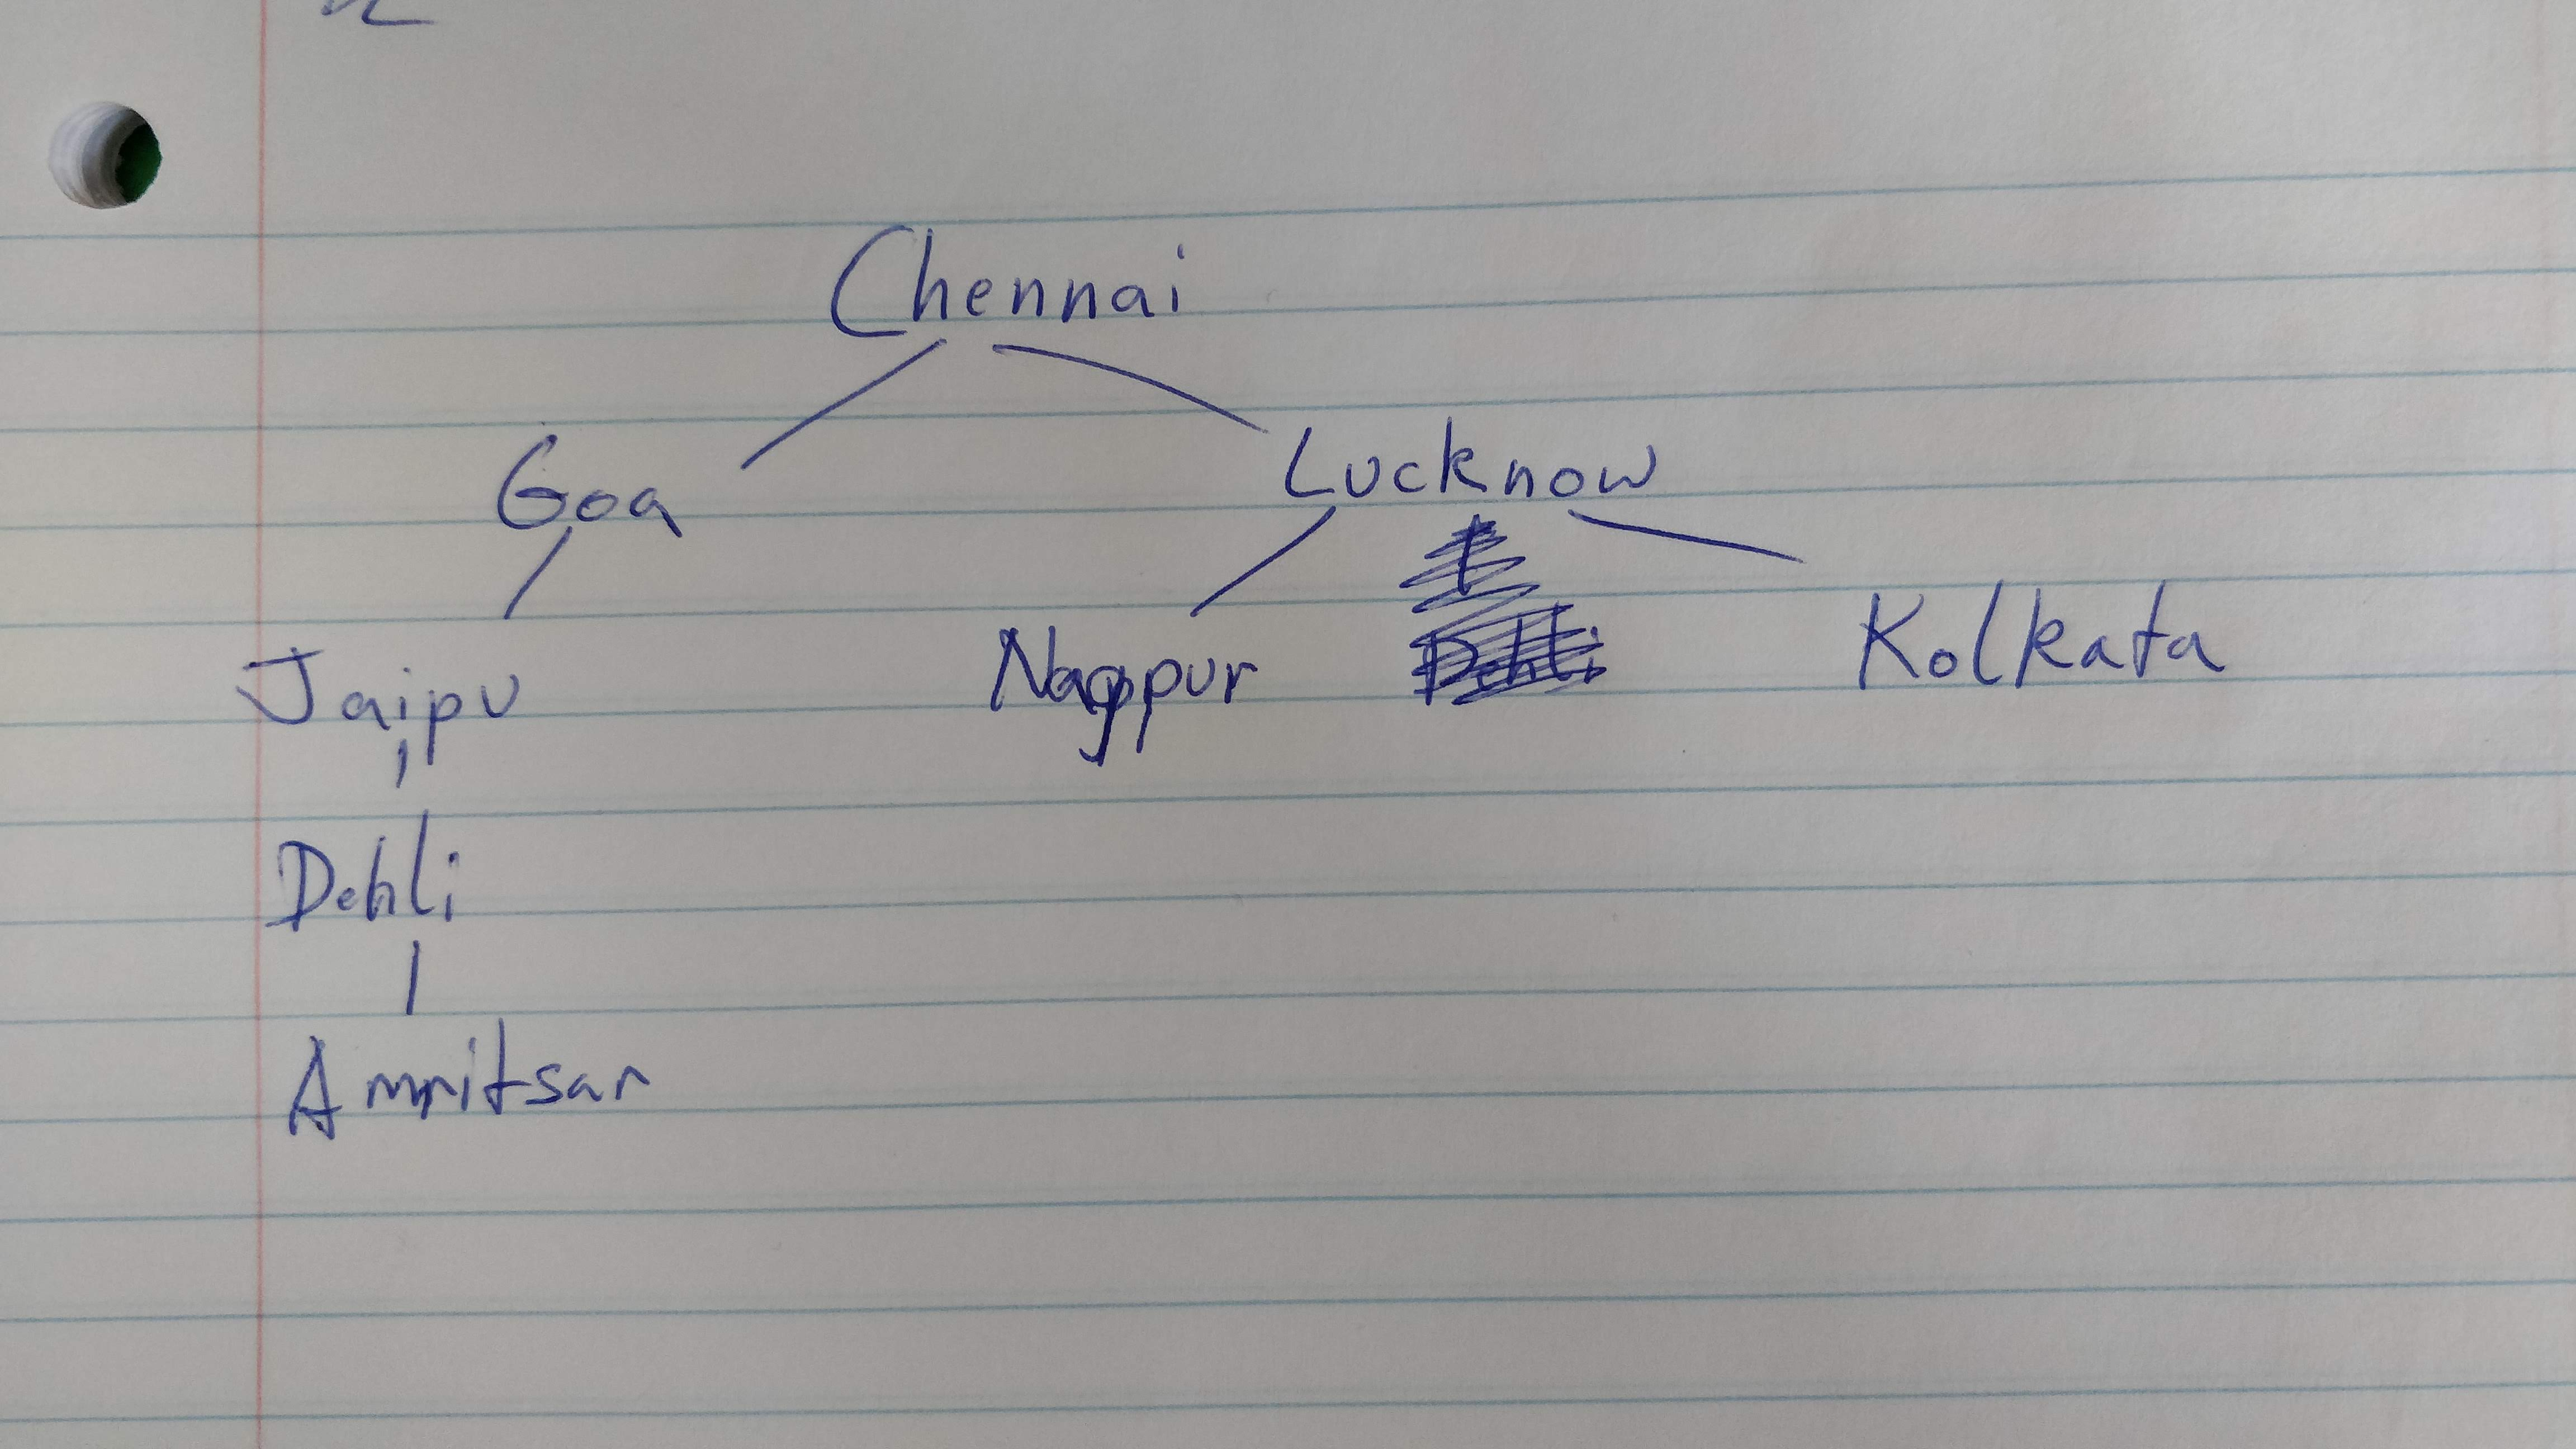

In [ ]:
# Find the shortest route

In [ ]:
graph = {}
graph['Sibiu'] = ['Fagaras', 'Rimnicu Vilcea']
graph['Fagaras'] = ['Sibiu', 'Bucharest']
graph['Rimnicu Vilcea'] = ['Sibiu', 'Pitesti', 'Craiova']
graph['Pitesti'] = ['Rimnicu Vilcea', 'Craiova', 'Bucharest']
graph['Craiova'] = ['Rimnicu Vilcea', 'Pitesti']
graph['Bucharest'] = ['Fagaras', 'Pitesti', 'Giurgiu']
graph['Giurgiu'] = ['Bucharest']

https://pythoninwonderland.wordpress.com/2017/03/18/how-to-implement-breadth-first-search-in-python/

In [ ]:
# finds shortest path between 2 nodes of a graph using BFS
def bfs_shortest_path(graph, start, goal):
    # keep track of explored nodes
    explored = []
    # keep track of all the paths to be checked
    queue = [[start]]
 
    # return path if start is goal
    if start == goal:
        return "Start is goal..."
 
    # keeps looping until all possible paths have been checked
    while queue:
        # pop the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            # go through all neighbour nodes, construct a new path and
            # push it into the queue
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                # return path if neighbour is goal
                if neighbour == goal:
                    return new_path
 
            # mark node as explored
            explored.append(node)
 
    # in case there's no path between the 2 nodes
    return "Path does not exist"

In [ ]:
bfs_shortest_path(graph, 'Sibiu', 'Bucharest')

['Sibiu', 'Fagaras', 'Bucharest']

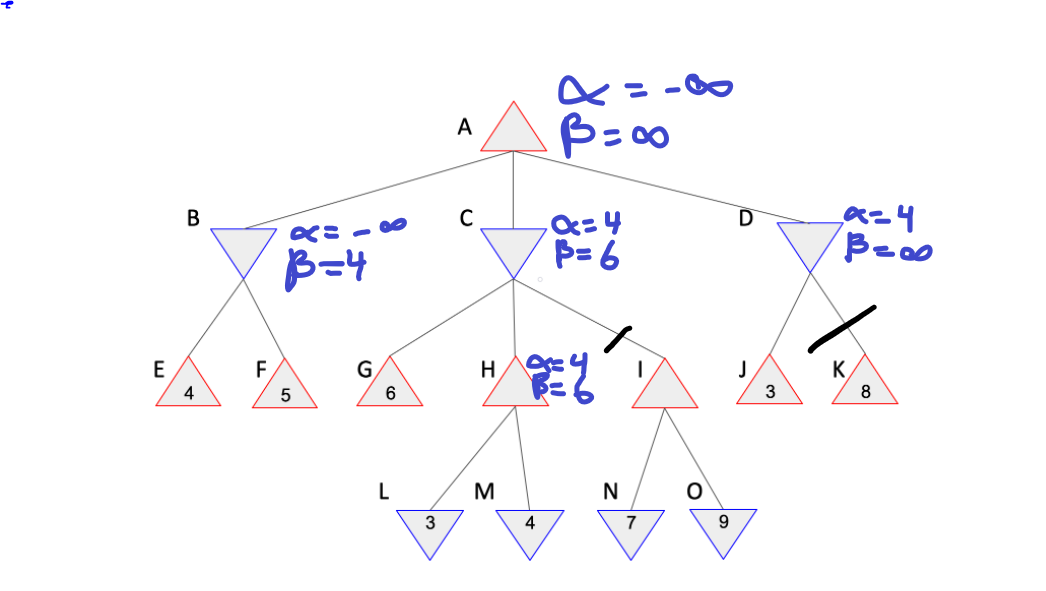

In [ ]:
corpus = [
    'Human machine interface for lab abc computer applications',
    'A survey of user opinion of computer system response time',
    'The EPS user interface management system',
    'System and human system engineering testing of EPS',
    'Relation of user perceived response time to error measurement',
    'The generation of random binary unordered trees',
    'The intersection graph of paths in trees',
    'Graph minors IV Widths of trees and well quasi ordering',
    'Graph minors A survey'
]

# remove stop words and tokenize them (we probably want to do some more
# preprocessing with our text in a real world setting, but we'll keep
# it simple here)
stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
texts = [
    [word for word in document.lower().split() if word not in stopwords]
    for document in corpus
]

# build a word count dictionary so we can remove words that appear only once
word_count_dict = {}
for text in texts:
    for token in text:
        word_count = word_count_dict.get(token, 0) + 1
        word_count_dict[token] = word_count

texts = [[token for token in text if word_count_dict[token] > 1] for text in texts]
texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
# http://ethen8181.github.io/machine-learning/search/bm25_intro.html
class BM25:

    def __init__(self, k1=1.5, b=0.75):
        self.b = b
        self.k1 = k1

    def fit(self, corpus):
        
        tf = []
        df = {}
        idf = {}
        doc_len = []
        corpus_size = 0
        for document in corpus:
            corpus_size += 1
            doc_len.append(len(document))

            # compute tf (term frequency) per document
            frequencies = {}
            for term in document:
                term_count = frequencies.get(term, 0) + 1
                frequencies[term] = term_count

            tf.append(frequencies)

            # compute df (document frequency) per term
            for term, _ in frequencies.items():
                df_count = df.get(term, 0) + 1
                df[term] = df_count

        for term, freq in df.items():
            idf[term] = math.log(1 + (corpus_size - freq + 0.5) / (freq + 0.5))

        self.tf_ = tf
        self.df_ = df
        self.idf_ = idf
        self.doc_len_ = doc_len
        self.corpus_ = corpus
        self.corpus_size_ = corpus_size
        self.avg_doc_len_ = sum(doc_len) / corpus_size
        return self

    def search(self, query):
        scores = [self._score(query, index) for index in range(self.corpus_size_)]
        return scores

    def _score(self, query, index):
        score = 0.0

        doc_len = self.doc_len_[index]
        frequencies = self.tf_[index]
        for term in query:
            if term not in frequencies:
                continue

            freq = frequencies[term]
            numerator = self.idf_[term] * freq * (self.k1 + 1)
            denominator = freq + self.k1 * (1 - self.b + self.b * doc_len / self.avg_doc_len_)
            score += (numerator / denominator)

        return score

In [ ]:
import math
# query our corpus to see which document is more relevant
query = 'The intersection of graph survey and trees'
query = [word for word in query.lower().split() if word not in stopwords]

bm25 = BM25()
bm25.fit(texts)
scores = bm25.search(query)

for score, doc in zip(scores, corpus):
    score = round(score, 3)
    print(str(score) + '\t' + doc)

0.0	Human machine interface for lab abc computer applications
0.999	A survey of user opinion of computer system response time
0.0	The EPS user interface management system
0.0	System and human system engineering testing of EPS
0.0	Relation of user perceived response time to error measurement
1.522	The generation of random binary unordered trees
2.532	The intersection graph of paths in trees
2.167	Graph minors IV Widths of trees and well quasi ordering
2.514	Graph minors A survey
